<h2>Початок<h2>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os



#шлях до файлу
path = "accident.csv"


# Зберігаємо дані у датафрейма
df = pd.read_csv(path)
df.head()

Перші 5 рядків даних:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Інформація про набір даних:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 # 

<h2>Розділяємо<h2>

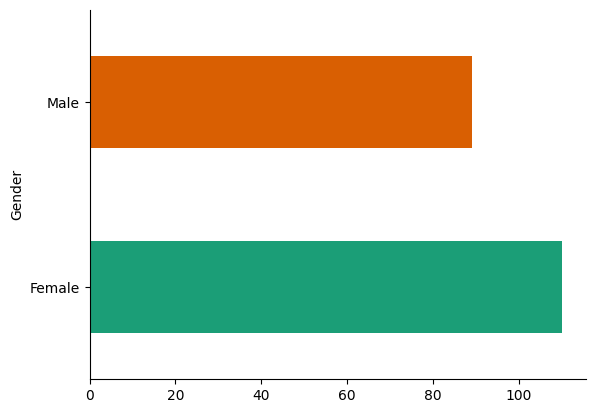

In [24]:
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

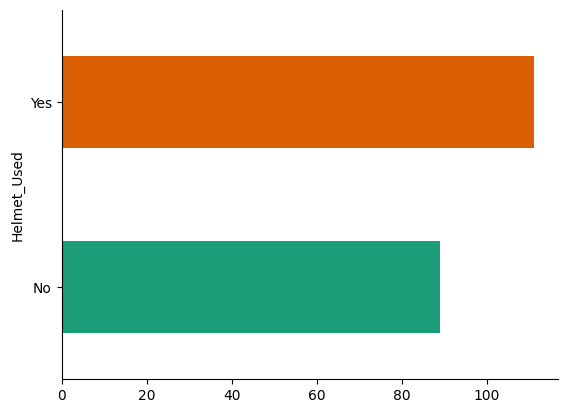

In [25]:
df.groupby('Helmet_Used').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

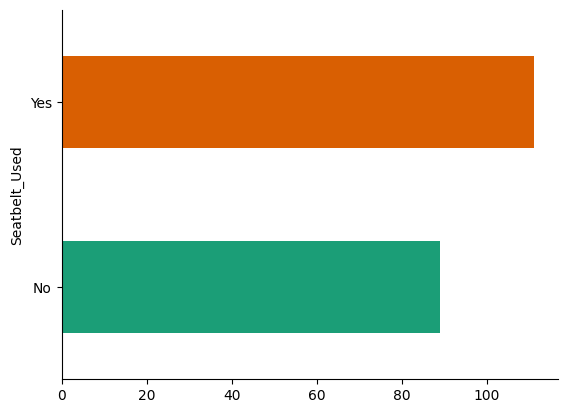

In [26]:
df.groupby('Seatbelt_Used').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
df.describe()

,Age,Speed_of_Impact,Survived
count,200.00000,197.000000,200.00000
mean,43.42500,70.441624,0.50500
std,14.94191,30.125298,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


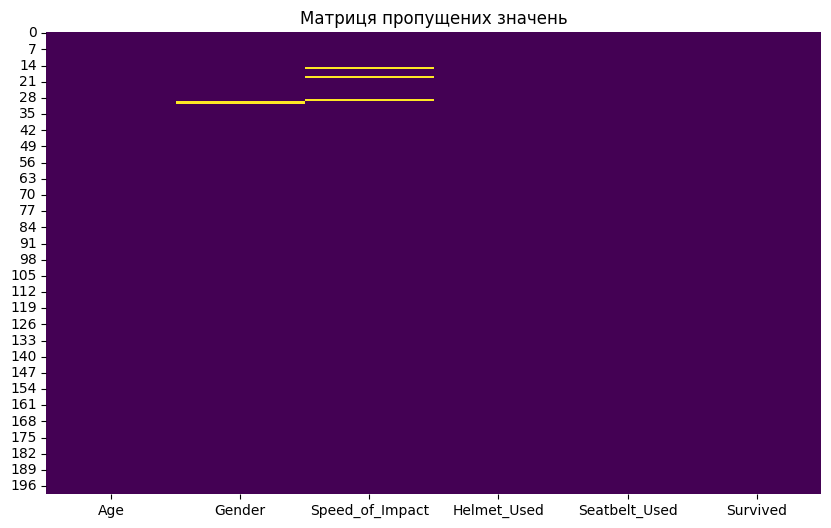

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap="viridis", cbar=False)
plt.title("Матриця пропущених значень")
plt.show()
#Все нормально

In [29]:
def convert_numerical_to_categorical(df, column_name):
    # Робимо поріг
    bins = [df[column_name].min(), 71, df[column_name].max()] #робимо поріг в 71(включно для Задовільно), що більше, буде віднесено в Незадовільно
    labels = ['Задовільна', 'Незадовільна']  # Змінено порядок міток
    
    df[column_name + '_category'] = pd.cut(df[column_name], bins=bins, labels=labels, include_lowest=True)
    
    print(f"\n--- Конвертація {column_name} у категорії ---")
    print(df[column_name + '_category'].value_counts())
    return df

In [30]:
df = convert_numerical_to_categorical(df, 'Speed_of_Impact')
contingency_table = pd.crosstab(df['Gender'], df['Speed_of_Impact_category'])
print("\n--- Таблиця спряженості ---")
print(contingency_table)


--- Конвертація Speed_of_Impact у категорії ---
Speed_of_Impact_category
Задовільна      99
Незадовільна    98
Name: count, dtype: int64

--- Таблиця спряженості ---
Speed_of_Impact_category  Задовільна  Незадовільна
Gender                                            
Female                            52            57
Male                              47            40


In [31]:
"""
Гіпотеза:

H0: Немає статистично значущого зв’язку між статтю та швидкістю.
Розподіл рівня швидкості ("Незадовільно", "Високий") не залежить від статі.

H1: Існує статистично значущий зв’язок між статтю та швидкістю.
Рівень швидкості розподіляється по-різному для чоловіків і жінок
"""

# Виконання тесту
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Вивід результатів
print("\n--- Результати χ²-тесту ---")
print(f"Статистика χ²: {chi2}")
print(f"p-значення: {p}")

#Оскільки p-значення (0.4623) > 0.05, ми не відхиляємо нульову гіпотезу (H0)


--- Результати χ²-тесту ---
Статистика χ²: 0.5402301815481783
p-значення: 0.46233734741668897


In [32]:
def analyze_speed_by_gender(df, speed_column, gender_column='Gender'):
   
    df[speed_column] = df[speed_column].astype(str)

    g = sns.FacetGrid(df, col=speed_column, height=6, aspect=1)
    g.map(sns.histplot, gender_column, kde=True, element="step", stat="density")  

    # Налаштування графіків
    g.set_axis_labels("Стать", "Щільність")
    g.set_titles("{col_name}")  # стать
    plt.suptitle(f'Розподіл {speed_column} для кожної статі', fontsize=14, y=1.05)
    plt.show()



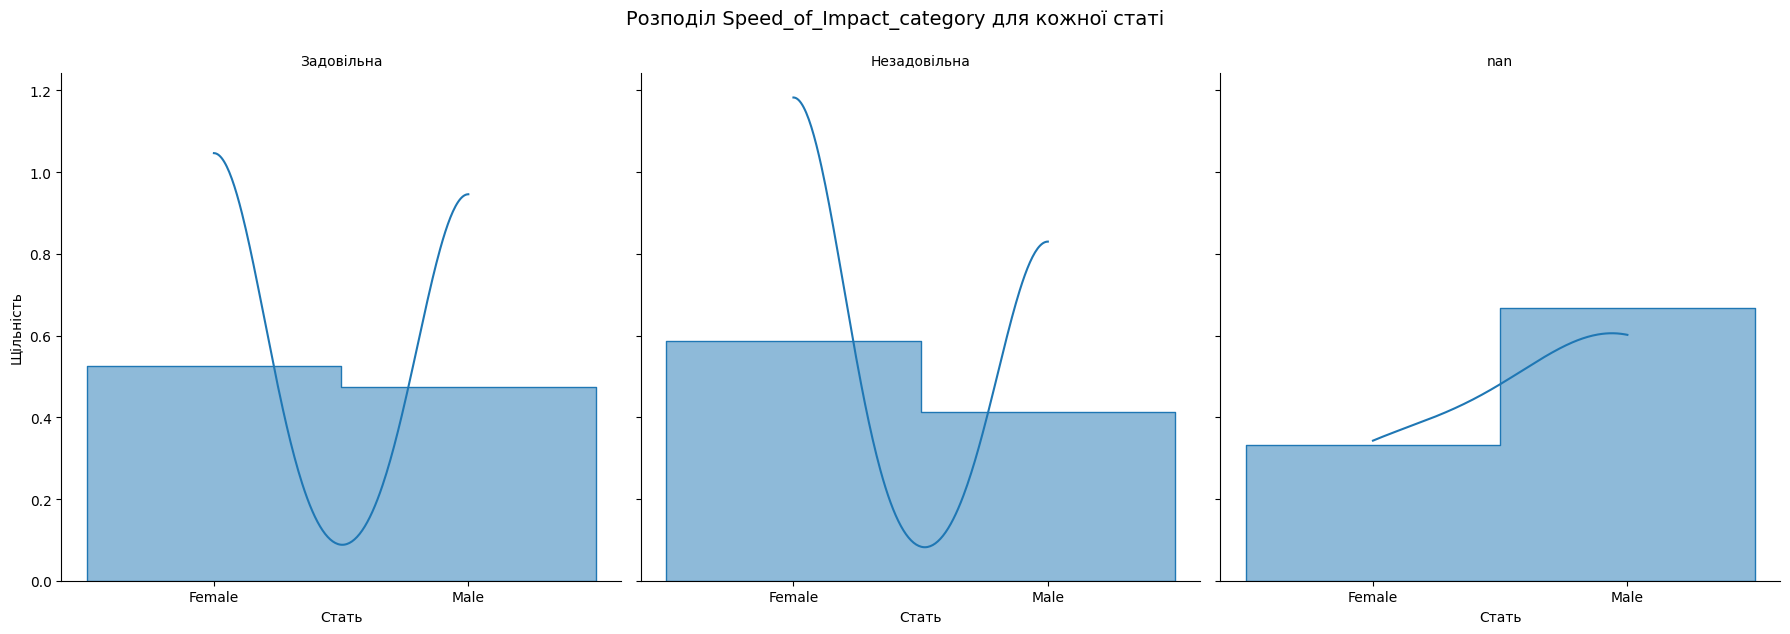

In [33]:
analyze_speed_by_gender(df, 'Speed_of_Impact_category')

<h1>Звіт<h1>
<h2>В цьому практикумі ми використали критерій Пірсона.
Зробили таблиці спряженості.
Ми дослідили відношення між статтю і швидкістю машини.<h2>

In [5]:
variables = ['Gender', 'Helmet_Used', 'Seatbelt_Used']
print("\n=== Відсотковий розподіл змінних ===")
for var in variables:
    print(f"\nРозподіл для {var} (%):")
    print(df[var].value_counts(normalize=True).round(4) * 100)


=== Відсотковий розподіл змінних ===

Розподіл для Gender (%):
Gender
Female    55.28
Male      44.72
Name: proportion, dtype: float64

Розподіл для Helmet_Used (%):
Helmet_Used
Yes    55.5
No     44.5
Name: proportion, dtype: float64

Розподіл для Seatbelt_Used (%):
Seatbelt_Used
Yes    55.5
No     44.5
Name: proportion, dtype: float64


In [6]:
# 2. Функція для аналізу попарних комбінацій
def analyze_pair(var1, var2, data, alpha=0.05):
    # Таблиця спряженості (абсолютні частоти)
    contingency_table = pd.crosstab(data[var1], data[var2])
    print(f"\nТаблиця спряженості ({var1} vs {var2}) - абсолютні частоти:")
    print(contingency_table)
    
    # Таблиця спряженості (відсотки по рядках)
    row_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    print(f"\nТаблиця спряженості ({var1} vs {var2}) - відсотки по рядках (%):")
    print("(Показує розподіл {var2} у межах кожної категорії {var1}, нормалізовано за розміром груп)")
    print(row_percent.round(2))
    
    # Таблиця спряженості (відсотки по стовпцях)
    col_percent = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
    print(f"\nТаблиця спряженості ({var1} vs {var2}) - відсотки по стовпцях (%):")
    print("(Показує розподіл {var1} у межах кожної категорії {var2}, нормалізовано за розміром груп)")
    print(col_percent.round(2))
    
 
    
    # Тест хі-квадрат
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nРезультати тесту хі-квадрат ({var1} vs {var2}):")
    print(f"Chi2: {chi2:.4f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("Очікувані частоти:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns).round(2))
    
    # Перевірка обмеження: клітин з очікуваною частотою <5
    low_expected = (expected < 5).sum()
    total_cells = expected.size
    low_expected_percent = (low_expected / total_cells) * 100
    print(f"Кількість клітин з очікуваною частотою <5: {low_expected} ({low_expected_percent:.2f}%)")
    if low_expected_percent > 20:
        print("Попередження: Більше 20% клітин мають очікувану частоту <5. Результати можуть бути ненадійними.")
    
    # Обчислення коефіцієнта Крамера
    n = contingency_table.sum().sum()
    cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    print(f"Cramer's V (сила зв’язку): {cramer_v:.4f}")
    
    # Формулювання гіпотез
    print(f"\nГіпотези ({var1} vs {var2}):")
    print(f"H0: {var1} і {var2} не пов’язані.")
    print(f"H1: {var1} і {var2} пов’язані.")
    
    # Висновок
    print(f"\nВисновок ({var1} vs {var2}):")
    if p < alpha:
        print(f"Відхиляємо нульову гіпотезу (p = {p:.4f} < {alpha}): Є статистично значущий зв’язок між {var1} і {var2}.")
        print(f"Сила зв’язку (Cramer's V) = {cramer_v:.4f} (інтерпретація: {'слабкий' if cramer_v < 0.3 else 'помірний' if cramer_v < 0.5 else 'сильний'}).")
    else:
        print(f"Не відхиляємо нульову гіпотезу (p = {p:.4f} ≥ {alpha}): Немає статистично значущого зв’язку між {var1} і {var2}.")
    
    # Візуалізація таблиці спряженості
    plt.figure(figsize=(6, 4))
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
    plt.title(f"Таблиця спряженості: {var1} vs {var2}")
    plt.xlabel(var2)
    plt.ylabel(var1)
    plt.savefig(f'contingency_{var1}_vs_{var2}.png')
    plt.show()
    plt.close()

In [7]:
pairs = [
    ('Gender', 'Helmet_Used'),
    ('Gender', 'Seatbelt_Used'),
    ('Helmet_Used', 'Seatbelt_Used')
]

for var1, var2 in pairs:
    print(f"\n=== Аналіз {var1} vs {var2} ===")
    analyze_pair(var1, var2, df)


=== Аналіз Gender vs Helmet_Used ===


NameError: name 'df' is not defined